In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("ResultadosSabanetaSaber11.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe())


Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None
Primeras filas del dataset
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimie


Valores faltantes por columna:
Año            0
Sector         0
Colegio        0
Código DANE    0
Indicador      0
Resultado      0
dtype: int64


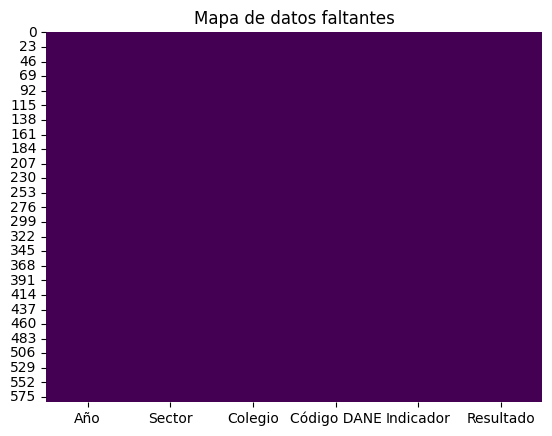

In [11]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

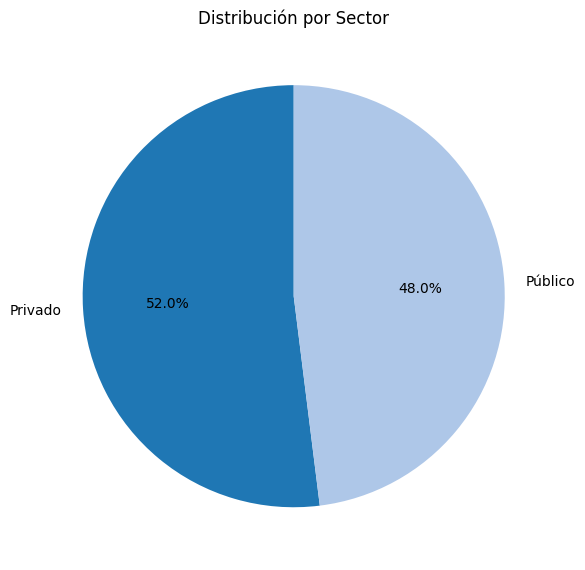

In [13]:
import matplotlib.pyplot as plt

# Lista de variables categóricas y titles para los gráficos
# Based on df.info(), the available categorical columns are 'Sector', 'Colegio', and 'Indicador'.
# I've included 'Sector' as an example. You can add other columns as needed.
categorical_vars = [
    ('Sector', 'Distribución por Sector')
    # ('Colegio', 'Distribución por Colegio'), # Uncomment to include Colegio (might be too many categories)
    # ('Indicador', 'Distribución por Indicador') # Uncomment to include Indicador (might be too many categories)
]

for var, title in categorical_vars:
    plt.figure(figsize=(6, 6))
    df[var].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors
    )
    plt.title(title)
    plt.ylabel('')  # Eliminar la etiqueta del eje y
    plt.tight_layout()
    plt.show()

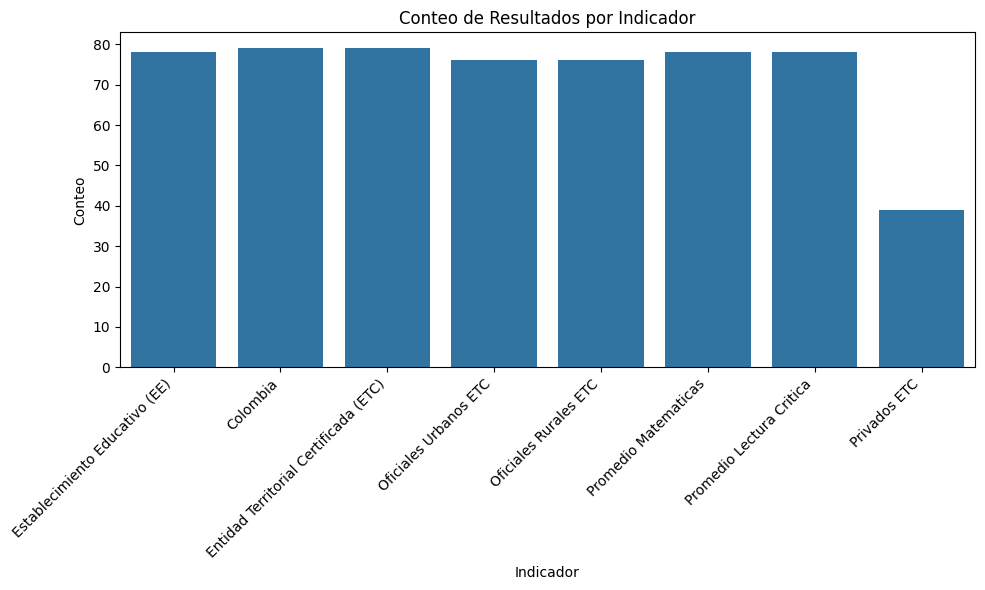

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Indicador')
plt.title('Conteo de Resultados por Indicador')
plt.xlabel('Indicador')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

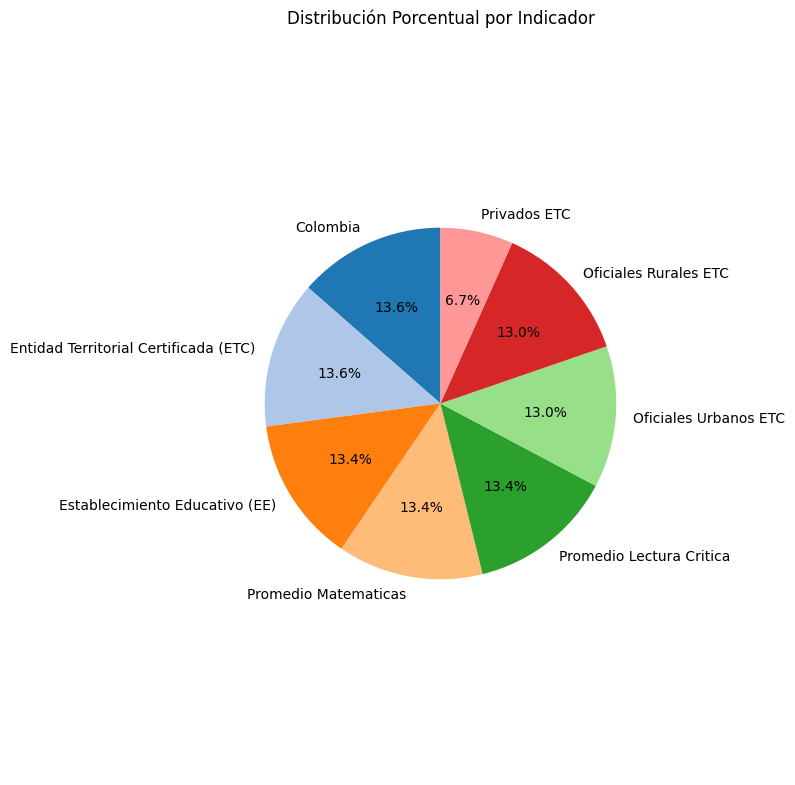

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(indicador_percentages_df['Percentage'], labels=indicador_percentages_df['Indicador'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribución Porcentual por Indicador')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

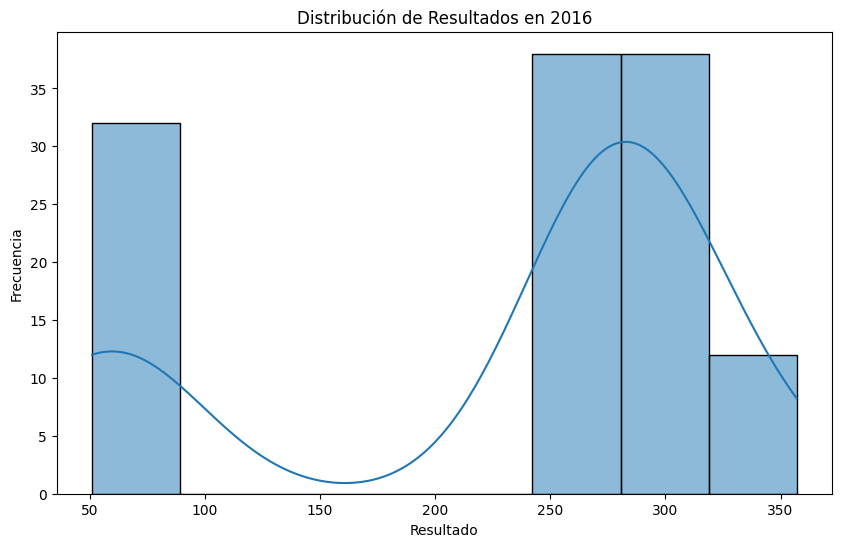

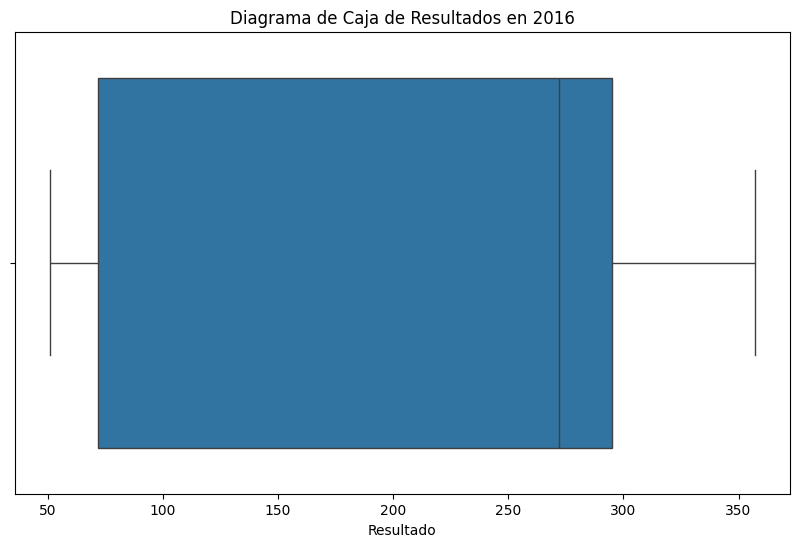

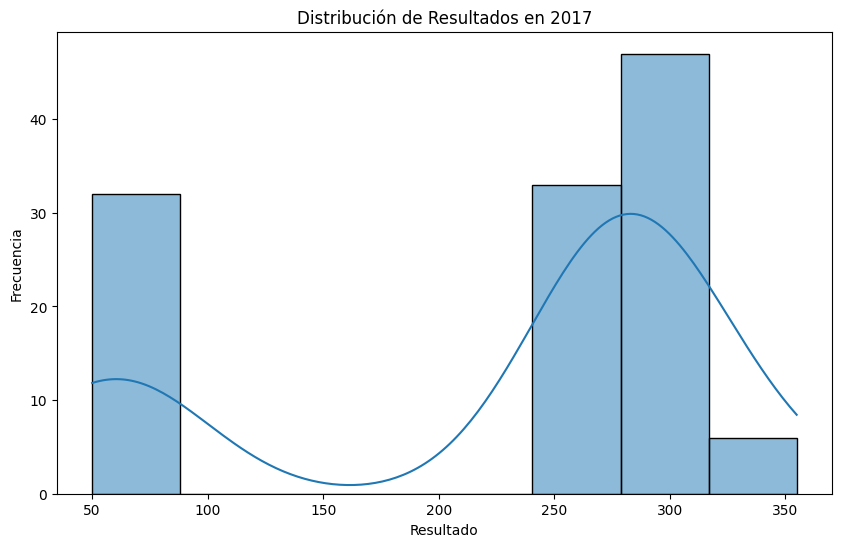

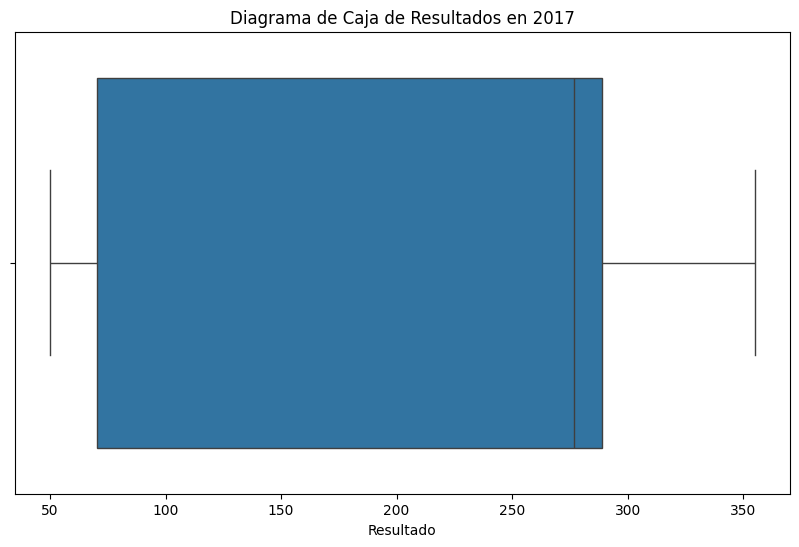

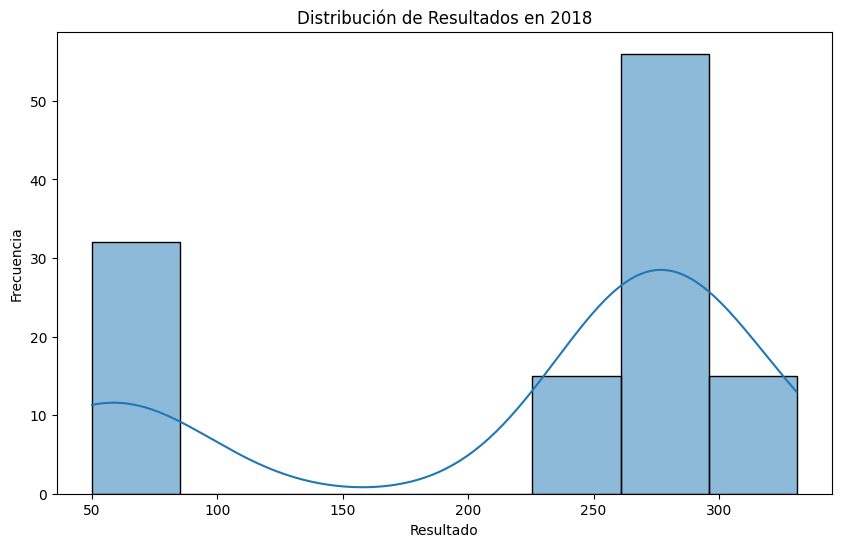

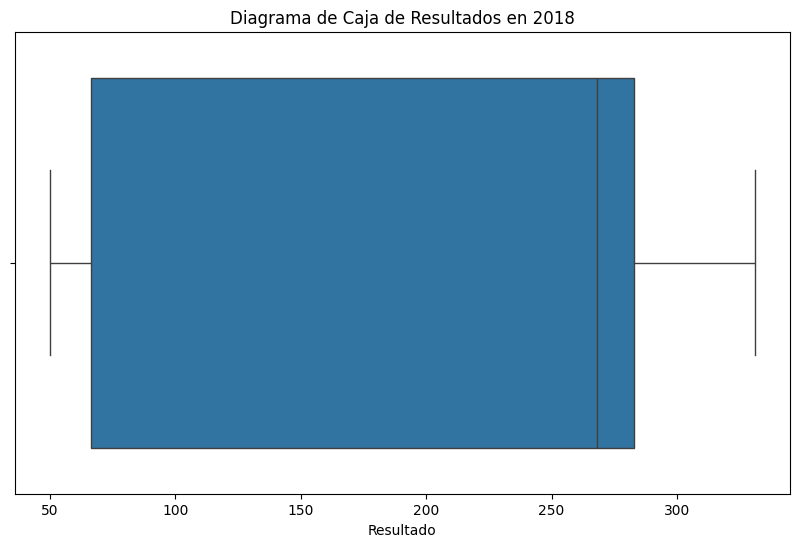

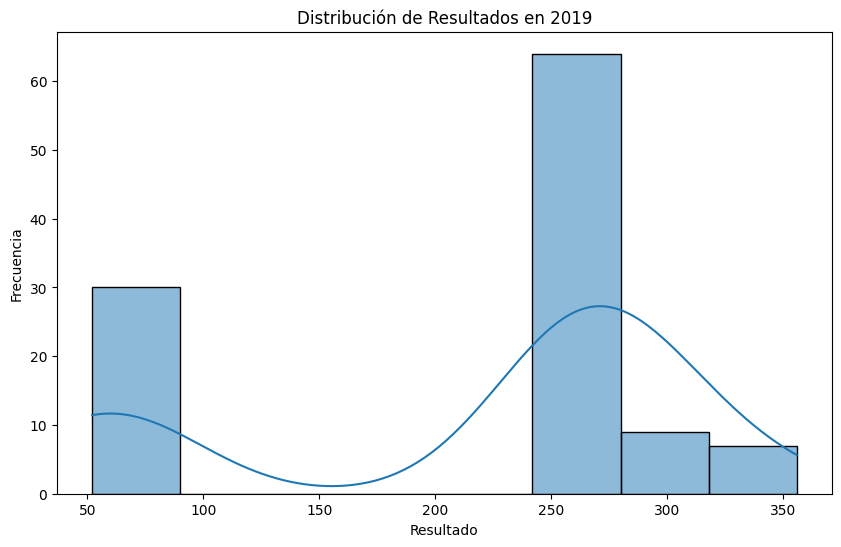

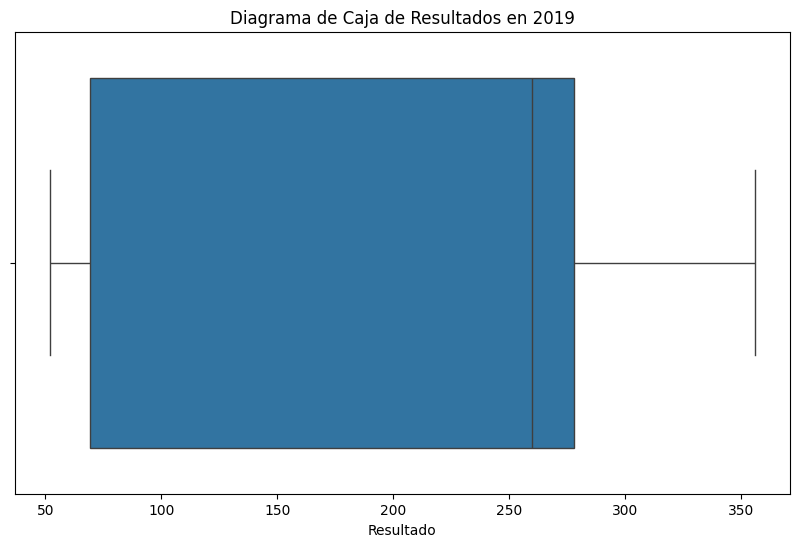

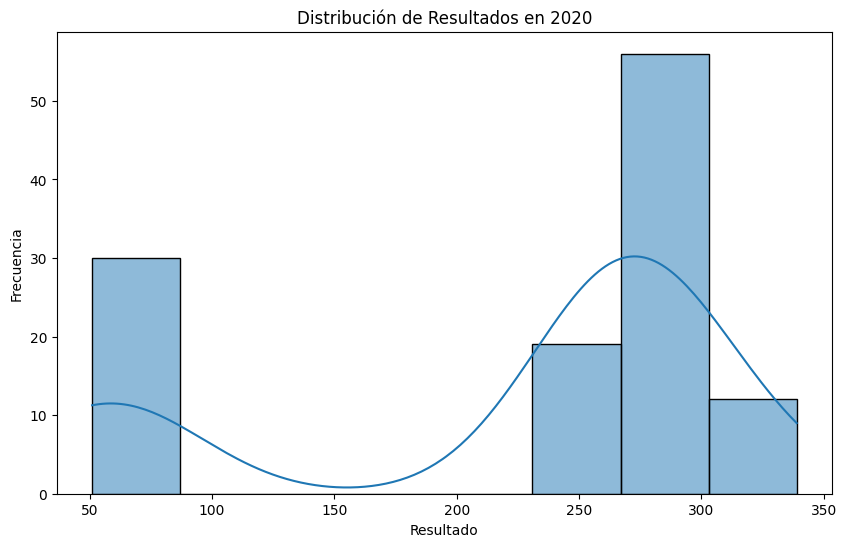

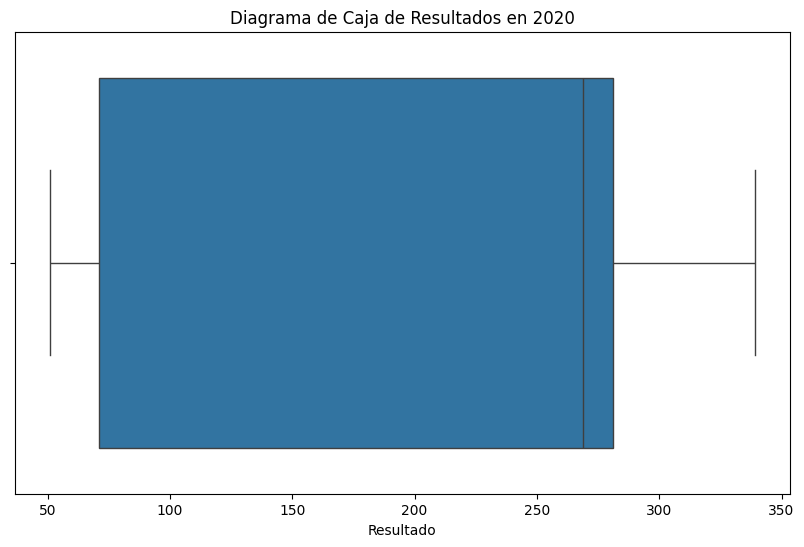

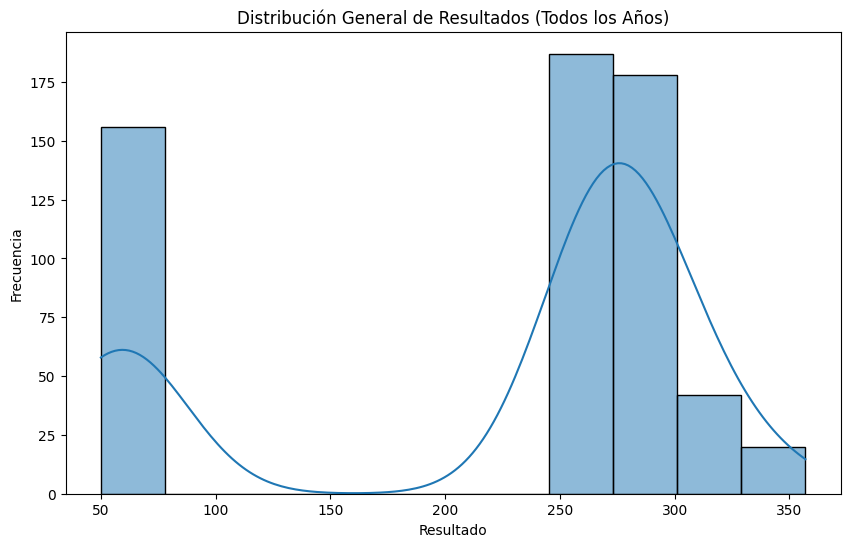

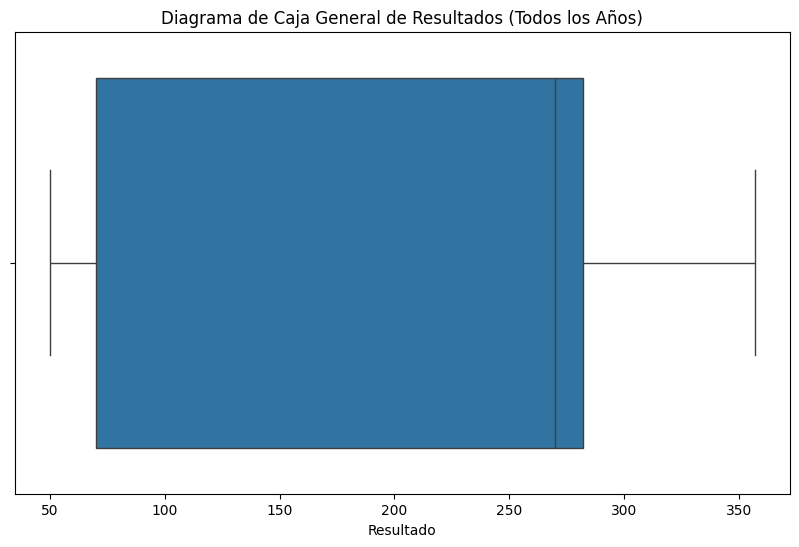

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Resultado', kde=True)
plt.title('Distribución General de Resultados (Todos los Años)')
plt.xlabel('Resultado')
plt.ylabel('Frecuencia')
plt.show()

# Overall Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Resultado')
plt.title('Diagrama de Caja General de Resultados (Todos los Años)')
plt.xlabel('Resultado')
plt.show()

In [23]:
# Calculate Q1, Q3, and IQR for the 'Resultado' column
Q1 = df['Resultado'].quantile(0.25)
Q3 = df['Resultado'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Resultado'] < lower_bound) | (df['Resultado'] > upper_bound)]

print("Número de valores atípicos encontrados:", len(outliers))
print("\nValores atípicos:")
display(outliers)

# Create a new DataFrame without outliers
df_no_outliers = df[(df['Resultado'] >= lower_bound) & (df['Resultado'] <= upper_bound)].copy()

print("\nInformación del nuevo DataFrame sin valores atípicos:")
print(df_no_outliers.info())
print("\nPrimeras filas del nuevo DataFrame sin valores atípicos:")
display(df_no_outliers.head())

Número de valores atípicos encontrados: 0

Valores atípicos:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado



Información del nuevo DataFrame sin valores atípicos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None

Primeras filas del nuevo DataFrame sin valores atípicos:


,Año,Sector,Colegio,Código DANE,Indicador,Resultado
0,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Establecimiento Educativo (EE),285
1,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Colombia,264
2,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Entidad Territorial Certificada (ETC),295
3,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Urbanos ETC,282
4,2016,Público,I.E. Adelaida Correa Estrada,105631000050,Oficiales Rurales ETC,272


from matplotlib import pyplot as plt
_df_0['Resultado'].plot(kind='hist', bins=20, title='Resultado')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Indicador').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Año']
  ys = series['Resultado']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Año', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('Resultado')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Año']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Año'}, axis=1)
              .sort_values('Año', ascending=True))
  xs = counted['Año']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Año', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Año')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Código DANE']
  ys = series['Resultado']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Código DANE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Código DANE')
_ = plt.ylabel('Resultado')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Código DANE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Código DANE'}, axis=1)
              .sort_values('Código DANE', ascending=True))
  xs = counted['Código DANE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Código DANE', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicador')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicador', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Código DANE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['Resultado'].plot(kind='line', figsize=(8, 4), title='Resultado')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Indicador'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='Resultado', y='Indicador', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

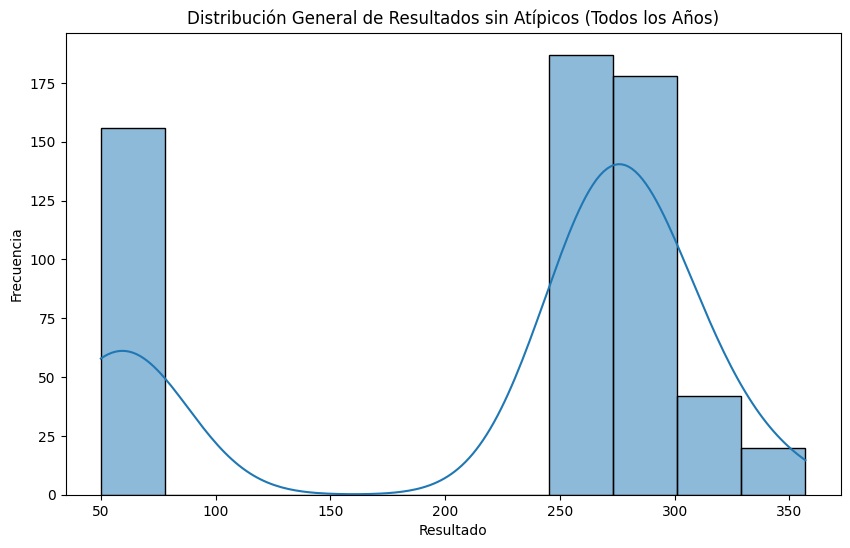

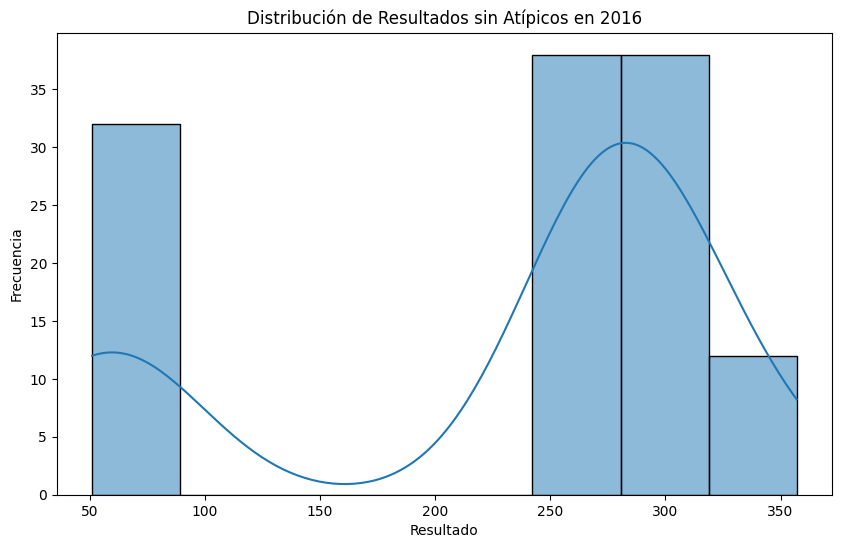

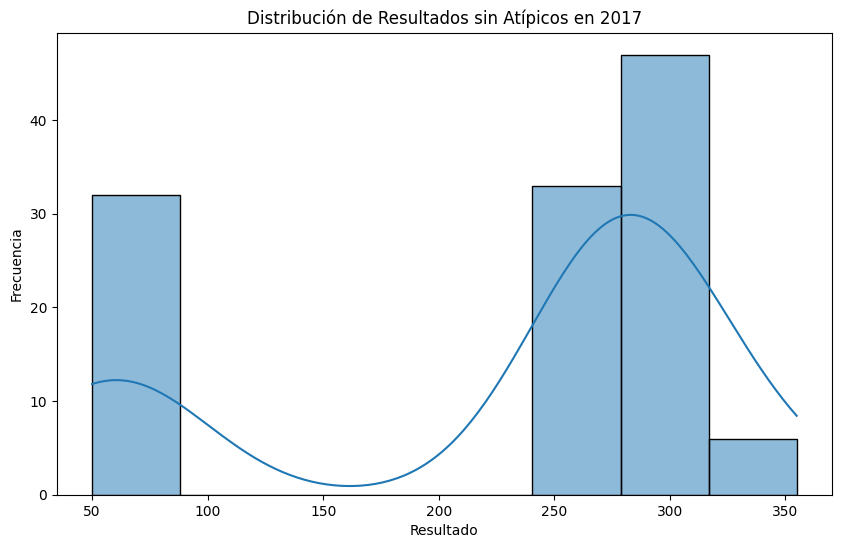

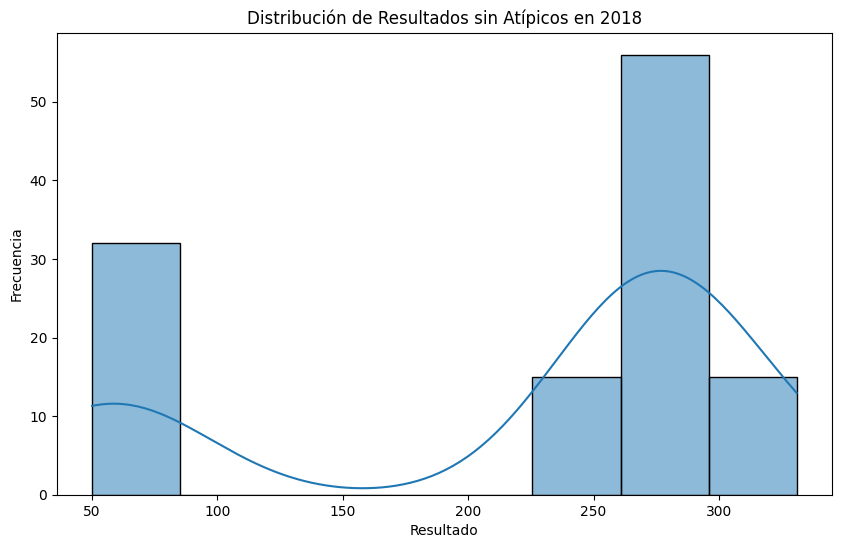

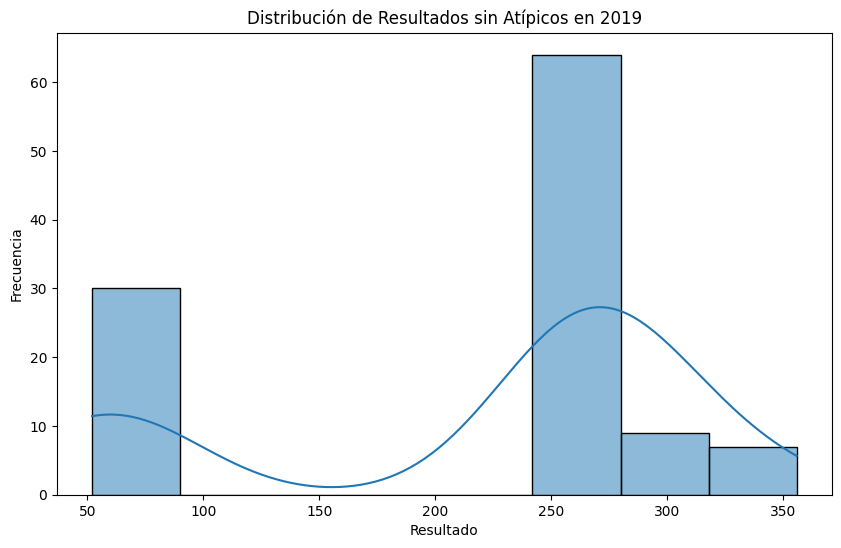

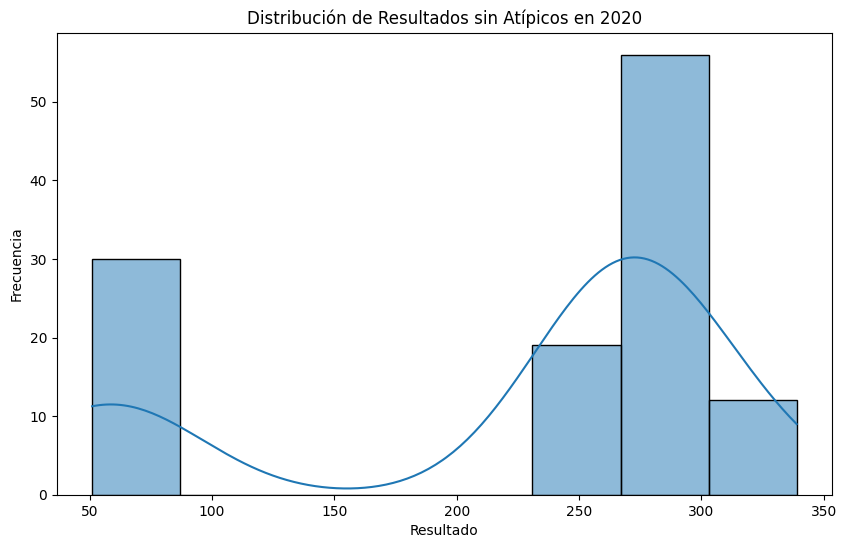

Shapiro-Wilk test: Statistic=0.7180, p-value=0.0000
Kolmogorov-Smirnov test (Lilliefors): Statistic=0.3530, p-value=0.0010
Anderson-Darling test: Statistic=80.5745
Critical values: [0.572 0.652 0.782 0.912 1.085]
Significance levels: [15.  10.   5.   2.5  1. ]
Jarque-Bera test: Statistic=105.4944, p-value=0.0000


<Figure size 800x600 with 0 Axes>

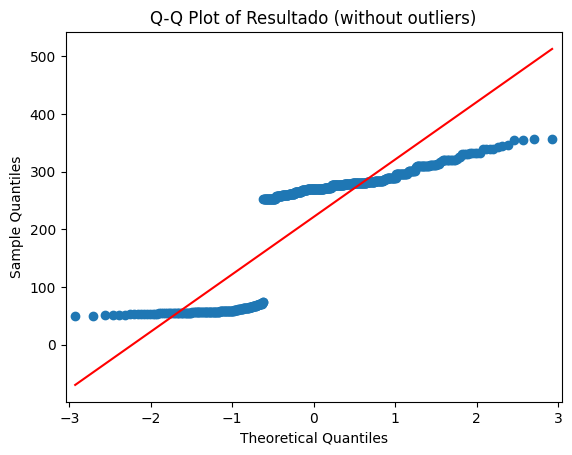

In [26]:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(df_no_outliers['Resultado'])
print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# Perform Kolmogorov-Smirnov test (using Lilliefors for normality)
ks_test = lilliefors(df_no_outliers['Resultado'])
print(f"Kolmogorov-Smirnov test (Lilliefors): Statistic={ks_test[0]:.4f}, p-value={ks_test[1]:.4f}")

# Perform Anderson-Darling test
ad_test = stats.anderson(df_no_outliers['Resultado'], dist='norm')
print(f"Anderson-Darling test: Statistic={ad_test.statistic:.4f}")
print("Critical values:", ad_test.critical_values)
print("Significance levels:", ad_test.significance_level)

# Perform Jarque-Bera test
jb_test = stats.jarque_bera(df_no_outliers['Resultado'])
print(f"Jarque-Bera test: Statistic={jb_test.statistic:.4f}, p-value={jb_test.pvalue:.4f}")

# Generate Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(df_no_outliers['Resultado'], line='s')
plt.title('Q-Q Plot of Resultado (without outliers)')
plt.show()